In [12]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
os.chdir("C:\\Users\\AISHWARYA\\Downloads\\Datasets-main\\ML")

In [14]:
os.getcwd()

'C:\\Users\\AISHWARYA\\Downloads\\Datasets-main\\ML'

In [15]:
df1=pd.read_csv('Salary_Data.csv')
print(df1)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


### Split the data into x and y  - Independent and Dependent variable


### Create X


In [16]:
x=df1.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
x=df1.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### Create Y


In [18]:
y=df1.iloc[:,-1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

### create the graph to check the trend

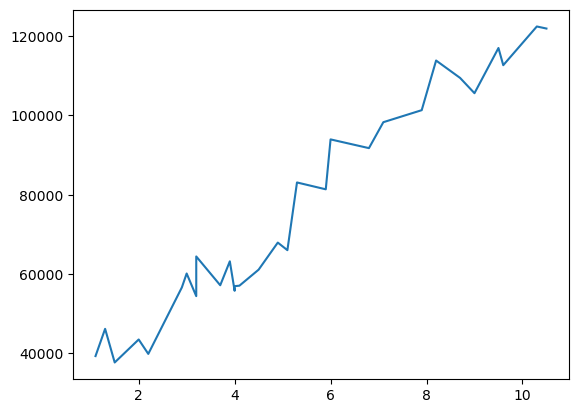

In [19]:
plt.plot(x,y)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

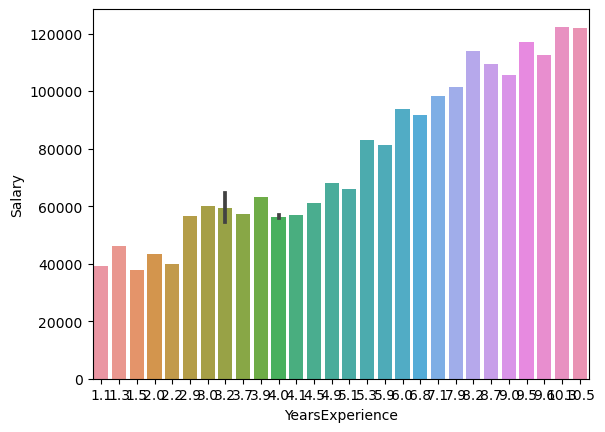

In [20]:
sns.barplot(x='YearsExperience',y='Salary',data=df1)

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_18664\2412203863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['YearsExperience'],kde=False,bins=10)


<Axes: xlabel='YearsExperience'>

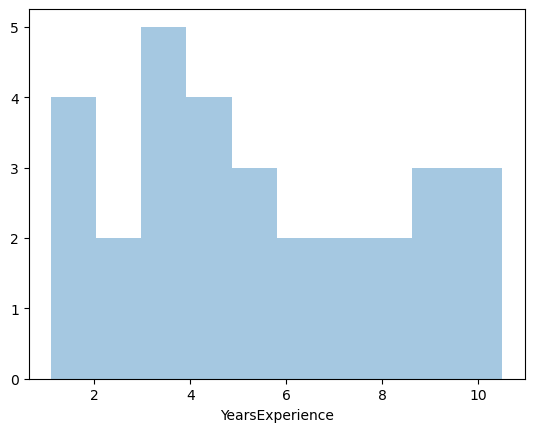

In [21]:
sns.distplot(df1['YearsExperience'],kde=False,bins=10)

<Axes: xlabel='count', ylabel='YearsExperience'>

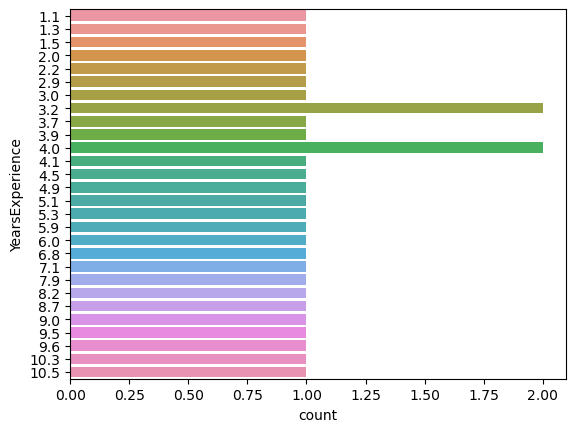

In [22]:
sns.countplot(y='YearsExperience',data=df1)

<Axes: >

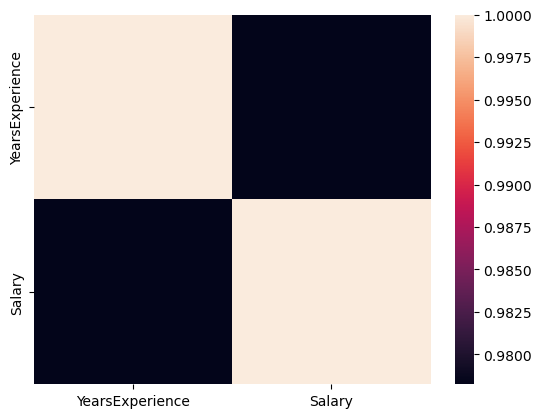

In [23]:
sns.heatmap(df1.corr())

### Split the Data – Train Test split 


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [25]:
x_train.shape

(24, 1)

In [26]:
x_test.shape

(6, 1)

In [27]:
y_train.shape

(24,)

In [28]:
y_test.shape

(6,)

### model fitting


In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
x_train

array([[ 4.1],
       [ 9. ],
       [ 6. ],
       [ 4. ],
       [ 8.2],
       [ 2. ],
       [ 1.1],
       [ 4.9],
       [ 4. ],
       [ 9.5],
       [ 3.7],
       [ 3.2],
       [ 3. ],
       [ 1.5],
       [ 1.3],
       [ 9.6],
       [ 5.3],
       [10.3],
       [ 3.2],
       [ 4.5],
       [10.5],
       [ 5.1],
       [ 7.9],
       [ 7.1]])

In [31]:
x_test

array([[5.9],
       [3.9],
       [6.8],
       [2.9],
       [8.7],
       [2.2]])

### prediction

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([ 81487.33746028,  62774.78205604,  89907.98739218,  53418.50435393,
       107684.91502621,  46869.10996244])

In [33]:
y_test

array([ 81363,  63218,  91738,  56642, 109431,  39891], dtype=int64)

### display the prediction with difference

In [51]:
df_x_test=pd.DataFrame(x_test,columns=['Experience'])
df_y_test=pd.DataFrame(y_test,columns=['Salary'])
df_y_test_pred=pd.DataFrame(y_pred,columns=['prediction'])
df_diff=df_y_test-df_y_test_pred
y_test_pred=pd.concat([df_x_test,df_y_test,df_y_test_pred],axis=1)
y_test_pred['Difference']=df_y_test['Salary']-df_y_test_pred['prediction']
print(y_test_pred)

   Experience  Salary     prediction   Difference
0         5.9   81363   81487.337460  -124.337460
1         3.9   63218   62774.782056   443.217944
2         6.8   91738   89907.987392  1830.012608
3         2.9   56642   53418.504354  3223.495646
4         8.7  109431  107684.915026  1746.084974
5         2.2   39891   46869.109962 -6978.109962


### accuracy of the model

In [35]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9795004834899222


### visualise train set results

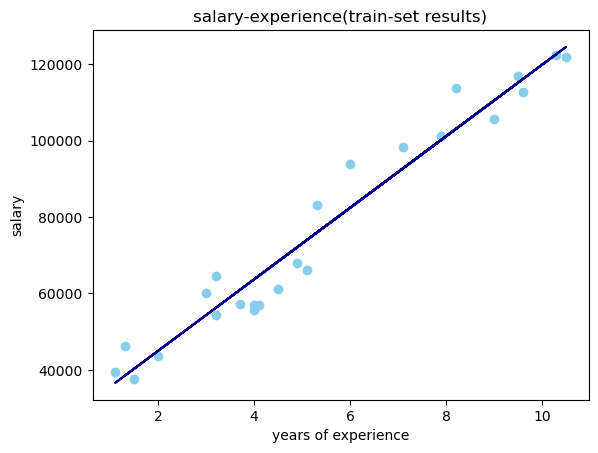

In [62]:
plt.scatter(x_train,y_train,color='skyblue')
plt.plot(x_train,lr.predict(x_train),color='darkblue')
plt.title('salary-experience(train-set results)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()


### visualise the test-set result

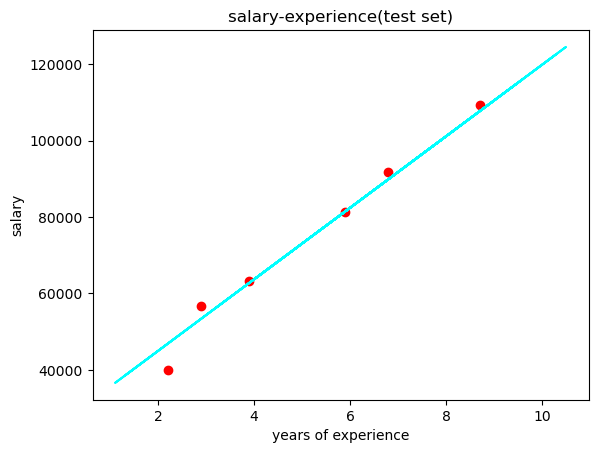

In [61]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='cyan')
plt.title('salary-experience(test set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

### graph test plot

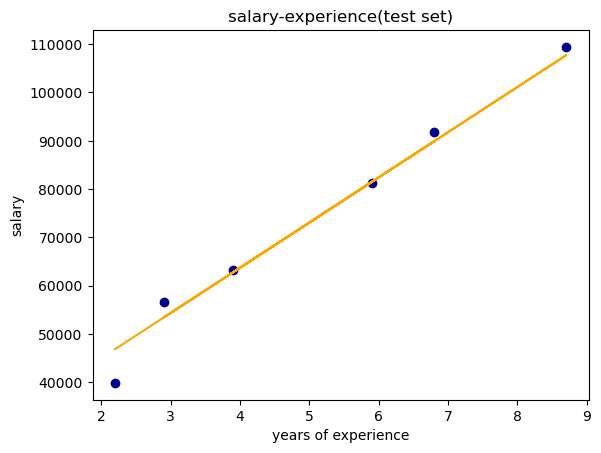

In [64]:
plt.scatter(x_test,y_test,color='darkblue')
plt.plot(x_test,y_pred,color='orange')
plt.title('salary-experience(test set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

### y=slope

In [37]:
#y=mx+c
lr.coef_

array([9356.27770212])

In [38]:
lr.intercept_

26285.29901778714

In [39]:
7.9*9383.69226753+26272.02649975691    #prediction
#proof


100403.1954132439

In [40]:
print(y_test_pred)

   Experience  Salary     prediction   Difference
0         5.9   81363   81487.337460  -124.337460
1         3.9   63218   62774.782056   443.217944
2         6.8   91738   89907.987392  1830.012608
3         2.9   56642   53418.504354  3223.495646
4         8.7  109431  107684.915026  1746.084974
5         2.2   39891   46869.109962 -6978.109962


### prediction with complete data

In [41]:
y_pred_final=lr.predict(x)
print(y_pred_final)


[ 36577.20449012  38448.46003054  40319.71557096  44997.85442202
  46869.10996244  53418.50435393  54354.13212414  56225.38766456
  56225.38766456  60903.52651562  62774.78205604  63710.40982626
  63710.40982626  64646.03759647  68388.54867731  72131.05975816
  74002.31529858  75873.57083901  81487.33746028  82422.96523049
  89907.98739218  92714.87070282 100199.89286451 103006.77617515
 107684.91502621 110491.79833684 115169.9371879  116105.56495811
 122654.95934959 124526.21489002]


### final result in dataframe

In [42]:
y_pred_final=pd.DataFrame(y_pred_final,columns=['prediction'])
result=pd.concat([df1,y_pred_final],axis=1)
result['Difference']=result['Salary']-result['prediction']
print(result)
result.to_excel("13_Aug_Simple Regression.xlsx")

    YearsExperience  Salary     prediction    Difference
0               1.1   39343   36577.204490   2765.795510
1               1.3   46205   38448.460031   7756.539969
2               1.5   37731   40319.715571  -2588.715571
3               2.0   43525   44997.854422  -1472.854422
4               2.2   39891   46869.109962  -6978.109962
5               2.9   56642   53418.504354   3223.495646
6               3.0   60150   54354.132124   5795.867876
7               3.2   54445   56225.387665  -1780.387665
8               3.2   64445   56225.387665   8219.612335
9               3.7   57189   60903.526516  -3714.526516
10              3.9   63218   62774.782056    443.217944
11              4.0   55794   63710.409826  -7916.409826
12              4.0   56957   63710.409826  -6753.409826
13              4.1   57081   64646.037596  -7565.037596
14              4.5   61111   68388.548677  -7277.548677
15              4.9   67938   72131.059758  -4193.059758
16              5.1   66029   7

### accuracy of the model

In [43]:
from sklearn.metrics import r2_score
accuracy=r2_score(y,y_pred_final)
print(accuracy)

0.9568625818650013


### create the graph with predicted numbers

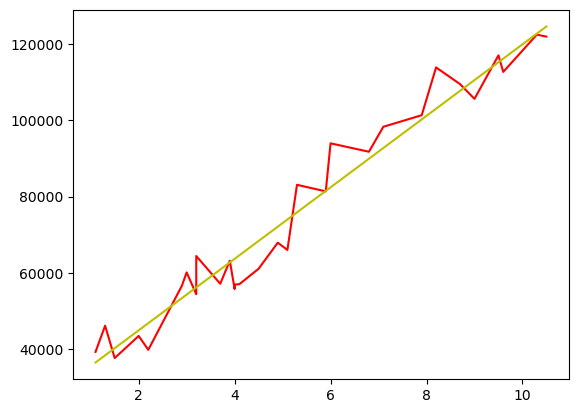

In [44]:
plt.plot(x,y,'r')
plt.plot(x,y_pred_final,'y')
plt.show()

### prediction of new set  of data

In [45]:
lr.predict([[12],[15]])

array([138560.63144319, 166629.46454954])

### calculating the residuals

In [66]:
#residuals->errors
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 2390.876432393765
MSE: 10949100.609762242
RMSE: 48.89658916932514
